## Bivariate Graphs

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [19]:
# load up our data set
fuel_econ = pd.read_csv('data/fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Scatter Plots

A scatter plot shows the relationship between two variables. The (Pearson) correlation coefficient (r) describes the strength of the relationship between the variables. $-1 \leq r \leq 1$ where values $r < 0$ indicate an inverse relationship and values $r > 0$ indicate a direct correlation. The closer the $\vert r \vert$ gets to 1 the stronger the correlation.

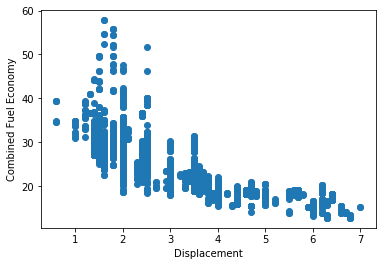

In [20]:
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Economy');

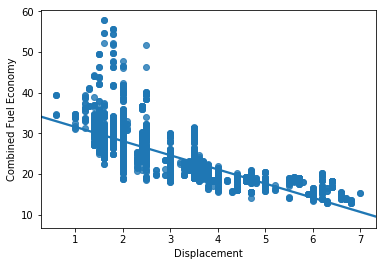

In [21]:
# an alternatvie plotting method is sb.regplot, which includes a linear regression line
sb.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Economy');

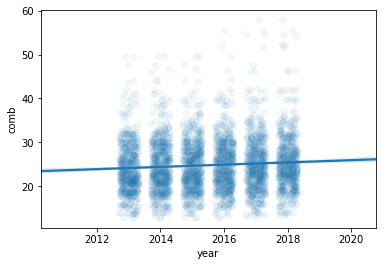

In [22]:
# correlating year with fuel efficience

# need to use jitter and transparency to fix overplotting
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3, scatter_kws = {'alpha': 1/20});

In [23]:
# figure out the right bin size for the heat map plot below
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


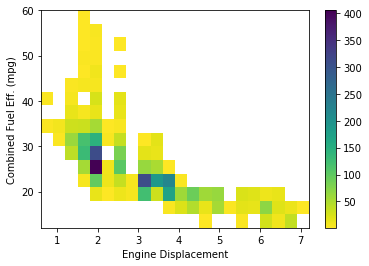

In [24]:
# plot engine size vs fuel efficiency using a heat map
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', 
           cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Engine Displacement')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [25]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [26]:
# look at fuel efficiency vs vehicle class (a qualitative variable)

# get the values for vehicle class so we can order them from smallest to largest
fuel_econ['VClass'].unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [27]:
# convert the type VClass from an object type to an ordered categorical type using pandas.astype
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

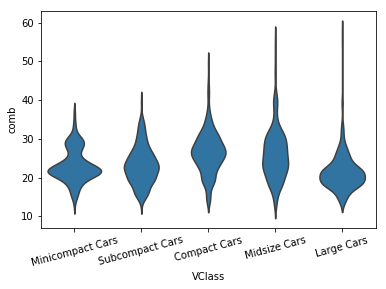

In [28]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = None)
plt.xticks(rotation = 15);

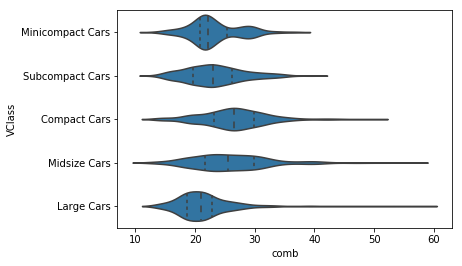

In [29]:
# rather than rotate, lets just change the orientation
sb.violinplot(data = fuel_econ, x = 'comb', y = 'VClass', color = base_color, inner = 'quartile');

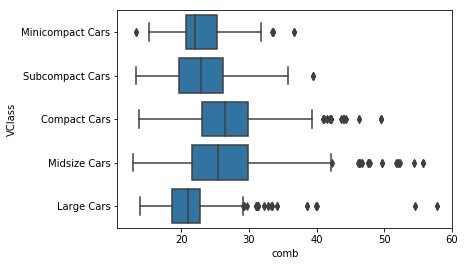

In [30]:
sb.boxplot(data = fuel_econ, x = 'comb', y = 'VClass', color = base_color);

In [31]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [32]:
# extract the type of transmition into its own column
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [37]:
# create a series summarizing class and transmition type
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

# convert the series into a DataFrame
ct_counts = ct_counts.reset_index(name = 'count')

# pivot to put count into the values and class and type as index and column
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


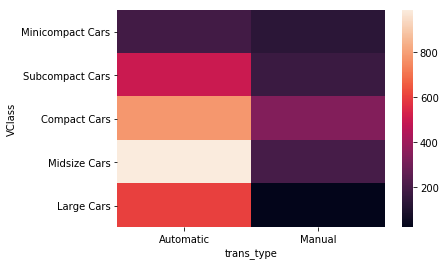

In [39]:
# the default heatmap is hot garbage
sb.heatmap(ct_counts);

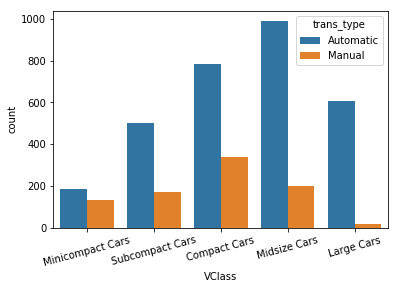

In [43]:
# use a clustered bar chart instead
sb.countplot(data = fuel_econ, x = 'VClass', hue='trans_type')
plt.xticks(rotation = 15);

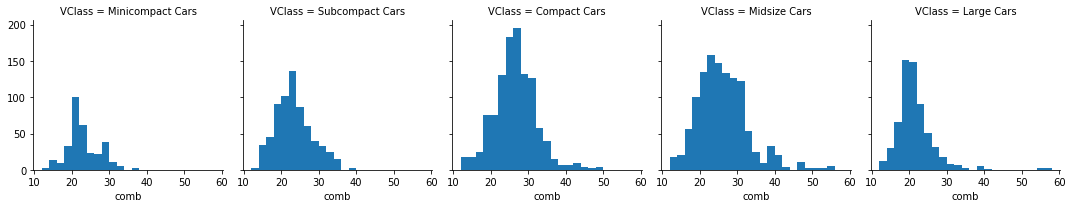

In [49]:
# create a faceted set of plots to explort the 'VClass' violin plots

# build a grid with a chart fore each vehicle class
bins = np.arange(12, 58+2, 2)
grid = sb.FacetGrid(data = fuel_econ, col = 'VClass')
grid.map(plt.hist, 'comb', bins = bins);

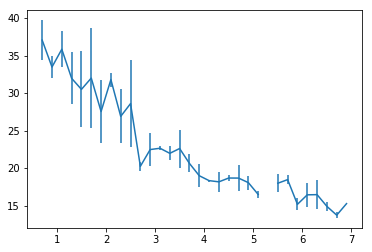

In [57]:
# line plot of fuel efficiency based on engine displacement

# set bin edges and centers for x value (displacemeent)
bins_e = np.arange(0.6, 7 + 0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

# use cut to segment segment and sort data values into bins
disp_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)

# take the mean of the fuel efficiency of points that fall in each bin
comb_mean = fuel_econ['comb'].groupby(disp_binned).mean()
comb_std = fuel_econ['comb'].groupby(disp_binned).std()

# plot the bins vs the mean
plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std);